In [6]:
# datasets
! wget https://files.grouplens.org/datasets/movielens/ml-25m.zip

--2024-06-10 14:35:03--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M  78.0MB/s    in 3.4s    

2024-06-10 14:35:06 (74.5 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]



In [7]:
# unzip
! unzip ml-25m.zip -d /content/data/

Archive:  ml-25m.zip
replace /content/data/ml-25m/tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/data/ml-25m/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/data/ml-25m/README.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/data/ml-25m/ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/data/ml-25m/genome-tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/data/ml-25m/genome-scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/data/ml-25m/movies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


##**Data Understanding**

In [8]:
# loads library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ignore all future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [9]:
# define dataset variable
movies = pd.read_csv('/content/data/ml-25m/movies.csv') #data film
ratings = pd.read_csv('/content/data/ml-25m/ratings.csv') #data ratings film
tags = pd.read_csv('/content/data/ml-25m/tags.csv') # data tag film
links = pd.read_csv('/content/data/ml-25m/links.csv') #data links setiap film
genome_tags = pd.read_csv('/content/data/ml-25m/genome-tags.csv') #data relevansi tag film
genome_scores = pd.read_csv('/content/data/ml-25m/genome-scores.csv') #data skor relevansi tag film

# check and count unique values in each dataframes
print('Jumlah data film: ', len(movies.movieId.unique()))
print('Jumlah data ratings atau penilaian: ', len(ratings.userId.unique()))
print('Jumlah data tags film: ', len(tags.userId.unique()))
print('Jumlah data links film: ', len(links.movieId.unique()))
print('Jumlah data genome tags: ', len(genome_tags.tagId.unique()))
print('Jumlah data genome scores: ', len(genome_scores.movieId.unique()))

Jumlah data film:  62423
Jumlah data ratings atau penilaian:  162541
Jumlah data tags film:  14592
Jumlah data links film:  62423
Jumlah data genome tags:  1128
Jumlah data genome scores:  13816


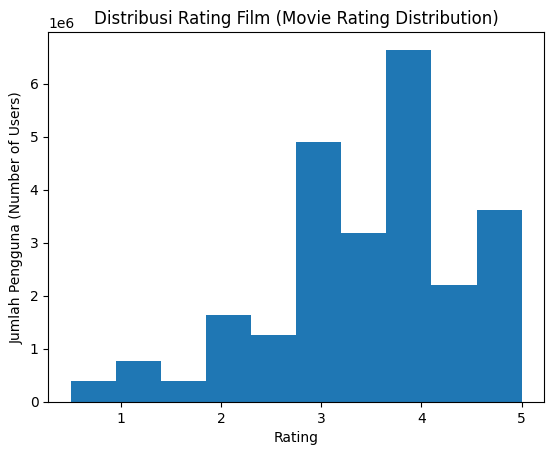

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from a CSV file (replace 'ratings.csv' with your actual file path)
data = pd.read_csv('/content/data/ml-25m/ratings.csv')

plt.hist(data['rating'])  # Plot the histogram of ratings
plt.xlabel('Rating')
plt.ylabel('Jumlah Pengguna (Number of Users)')
plt.title('Distribusi Rating Film (Movie Rating Distribution)')  # Add a title (optional)
plt.show()

In [15]:
# Analisis popularitas film
top_movies = data.groupby('movieId')['rating'].count().sort_values(ascending=False).head(10)
print(top_movies)

# Analisis preferensi pengguna
user_ratings = data.groupby('userId')['rating'].mean().sort_values(ascending=False)
print(user_ratings.head(10))

# Hubungan antar film berdasarkan genre
genre_data = pd.read_csv('/content/data/ml-25m/movies.csv')
movies_with_genres = data.merge(genre_data[['movieId', 'genres']], on='movieId')
genre_matrix = pd.pivot_table(movies_with_genres, index='movieId', columns='genres', values='rating', aggfunc='mean')
print(genre_matrix.head())

movieId
356     81491
318     81482
296     79672
593     74127
2571    72674
260     68717
480     64144
527     60411
110     59184
2959    58773
Name: rating, dtype: int64
userId
120485    5.0
25853     5.0
35589     5.0
95750     5.0
97237     5.0
147729    5.0
99882     5.0
126317    5.0
21357     5.0
113903    5.0
Name: rating, dtype: float64
genres   (no genres listed)  Action  Action|Adventure  \
movieId                                                 
1                       NaN     NaN               NaN   
2                       NaN     NaN               NaN   
3                       NaN     NaN               NaN   
4                       NaN     NaN               NaN   
5                       NaN     NaN               NaN   

genres   Action|Adventure|Animation  Action|Adventure|Animation|Children  \
movieId                                                                    
1                               NaN                                  NaN   
2                    

In [16]:
movies.info()

ratings.info()

tags.info()

links.info()

genome_tags.info()

genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-nu

##**Data Preparation**

In [17]:
import pandas as pd

def clean_movie_titles(movies_df):
  """
  This function cleans and extracts the year of release from movie titles
  in the provided DataFrame.

  Args:
      movies_df (pandas.DataFrame): The DataFrame containing movie data.

  Returns:
      pandas.DataFrame: The DataFrame with cleaned titles and a new 'year_of_release' column.
  """

  # Extract year using regular expressions and handle potential errors
  movies_df['year_of_release'] = movies_df['title'].str.extract('(\d{4})', expand=False)
  movies_df['year_of_release'] = pd.to_numeric(movies_df['year_of_release'], errors='coerce')  # Convert to numeric (handle missing values)

  # Clean titles by removing year in parentheses and extra spaces
  def clean_title(title):
    if pd.isna(title):
      return title  # Handle missing values
    parts = title.split('(', 1)
    return parts[0].strip()  # Remove year in parentheses and leading/trailing spaces

  movies_df['title'] = movies_df['title'].apply(clean_title)

  return movies_df

# Assuming you have your movies data loaded in a DataFrame named 'movies'
movies = clean_movie_titles(movies.copy())  # Clean a copy to avoid modifying original data
movies.head()


,movieId,title,genres,year_of_release
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


Users ratings

In [18]:
import pandas as pd
import numpy as np

# Assuming you have your ratings data loaded in a DataFrame named 'ratings'

# Check for unique rating values (before rounding)
print("Unique rating values (before rounding):")
print(ratings['rating'].unique())

# Round ratings (optional)
# You can comment out this line if you prefer keeping decimal ratings
round_ratings = input("Do you want to round ratings to the nearest integer (yes/no)? ").lower()
if round_ratings == "yes":
  ratings['rating'] = np.round(ratings['rating'])

# Check for unique rating values (after rounding)
print("\nUnique rating values (after rounding):")
print(ratings['rating'].unique())

# Convert timestamp to datetime format (assuming timestamps are in seconds since epoch)
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Display the first few rows of the DataFrame
print("\nRatings DataFrame (Head):")
print(ratings.head())


Unique rating values (before rounding):
[5.  3.5 4.  2.5 4.5 3.  0.5 2.  1.  1.5]
Do you want to round ratings to the nearest integer (yes/no)? yes

Unique rating values (after rounding):
[5. 4. 2. 3. 0. 1.]

Ratings DataFrame (Head):
   userId  movieId  rating           timestamp
0       1      296     5.0 2006-05-17 15:34:04
1       1      306     4.0 2006-05-17 12:26:57
2       1      307     5.0 2006-05-17 12:27:08
3       1      665     5.0 2006-05-17 15:13:40
4       1      899     4.0 2006-05-17 12:21:50


In [19]:
import pandas as pd
import numpy as np

# Assuming you have your 'movies' and 'ratings' DataFrames

# Merge movies and ratings data
films = pd.merge(movies.copy(), ratings.copy(), on='movieId', how='left')

# Check for missing values (all columns)
missing_values = films.isnull().sum()
print("Missing values by column:")
print(missing_values)

# Handle missing values (consider data exploration and analysis needs)
# You can choose appropriate strategies like imputation, removal, etc.
# Here, we'll simply drop rows with missing values for demonstration purposes
films = films.dropna()

# Check for missing values again (after dropping)
print("\nMissing values (after dropping):")
print(films.isnull().sum())

# Explore genre distribution
num_genres = len(films['genres'].unique())
unique_genres = films['genres'].unique()
print(f"\nNumber of unique genres: {num_genres}")
print("Unique genres:")
print(unique_genres)

# Filter out movies with "(no genres listed)"
films = films[films['genres'] != '(no genres listed)']

# Show first few rows of the cleaned DataFrame
print("\nCleaned Films DataFrame (Head):")
print(films.head())

# Group by movie and calculate sum (consider what's relevant for your analysis)
# Here, we'll calculate the total number of ratings per movie
movie_ratings = films.groupby('movieId')['rating'].sum()
print("\nTotal ratings per movie:")
print(movie_ratings)

# Filter movies with at least 50 ratings (adjust threshold as needed)
min_ratings = 50
films = films[films['movieId'].isin(movie_ratings[movie_ratings >= min_ratings].index)]
print(f"\nFilms with at least {min_ratings} ratings:")
print(films.head())

# Check for duplicate rows
num_duplicated_movieId = films.duplicated('movieId').sum()
num_duplicated_title = films.duplicated('title').sum()
print(f"\nNumber of duplicate rows (by movieId): {num_duplicated_movieId}")
print(f"Number of duplicate rows (by title): {num_duplicated_title}")

# Drop duplicate rows (consider which identifier is more important)
films = films.drop_duplicates(subset='movieId')  # Drop duplicates by movieId
# Optional: films = films.drop_duplicates(subset='title')  # Drop duplicates by title (if needed)

# Replace 'sci-fi' variations with a standardized term (adjust regex for your needs)
films = films.replace(to_replace=r'[nS]ci-Fi', value='Sci-Fi', regex=True)

# Prepare a cleaner DataFrame for further analysis
preparation = films.sort_values('movieId')
print("\nPreparation DataFrame (Head):")
print(preparation.head())

# Extract data into lists (consider using .to_numpy() for efficiency)
film_id = preparation['movieId'].tolist()
film_name = preparation['title'].tolist()
film_genre = preparation['genres'].tolist()

# Validate list lengths (optional)
assert len(film_id) == len(film_name) == len(film_genre)

# Create a DataFrame from lists
df_film = pd.DataFrame({
    'film_id': film_id,
    'film_name': film_name,
    'genre': film_genre
})

print("\nFinal DataFrame (df_film):")
print(df_film.head())

Missing values by column:
movieId                0
title                  0
genres                 0
year_of_release    11581
userId              3376
rating              3376
timestamp           3376
dtype: int64

Missing values (after dropping):
movieId            0
title              0
genres             0
year_of_release    0
userId             0
rating             0
timestamp          0
dtype: int64

Number of unique genres: 1621
Unique genres:
['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Children|Comedy|Fantasy|Mystery' 'Children|Comedy|Crime|Fantasy'
 'Comedy|Horror|Mystery|Sci-Fi|Western']

Cleaned Films DataFrame (Head):
   movieId      title                                       genres  \
0        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story  Adve

##**Model Development**

Content Based Filtering

In [20]:
# data sample
data = df_film
data.sample(5)

,film_id,film_name,genre
11185,60461,"Home of Dark Butterflies, The",Drama
12283,73981,Man Hunt,Crime|Drama|Thriller
4135,4373,Pootie Tang,Comedy
8907,31447,Magic in the Water,Adventure|Children|Fantasy
2081,2221,Blackmail,Drama|Thriller


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming you have your 'data' DataFrame containing a 'genre' column

# Create a TfidfVectorizer object
tf = TfidfVectorizer()

# Fit the vectorizer to the genre text (learn word importance)
tf.fit(data['genre'])

# Get the feature names (genre vocabulary)
genre_features = tf.get_feature_names_out()

# Fit and transform the genre data to a TF-IDF matrix (weighting by importance)
tfidf_matrix = tf.fit_transform(data['genre'])

# Display the matrix dimensions (number of movies, number of genre features)
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Convert the TF-IDF matrix to a dense representation (optional)
# This can be useful for visualization or further calculations
dense_tfidf_matrix = tfidf_matrix.todense()

# Create a DataFrame for the TF-IDF matrix
tfidf_df = pd.DataFrame(
    dense_tfidf_matrix,
    columns=genre_features,
    index=data['film_name']
)

# Sample a random subset of genres (20) and movies (10) for a concise view
sampled_tfidf_df = tfidf_df.sample(20, axis=1).sample(10, axis=0)
print("\nSampled TF-IDF Matrix (Head):")
print(sampled_tfidf_df.head())


TF-IDF Matrix Shape: (19662, 21)

Sampled TF-IDF Matrix (Head):
                                             western  fantasy  documentary  \
film_name                                                                    
One Hour with You                                0.0      0.0          0.0   
Garden State                                     0.0      0.0          0.0   
The Ghost                                        0.0      0.0          0.0   
101 Dalmatians II: Patch's London Adventure      0.0      0.0          0.0   
Yi Yi                                            0.0      0.0          0.0   

                                              fi   musical  animation  film  \
film_name                                                                     
One Hour with You                            0.0  0.776839   0.000000   0.0   
Garden State                                 0.0  0.000000   0.000000   0.0   
The Ghost                                    0.0  0.000000   0.000000   0

Cosine Similarity

In [22]:
# calculate cosine similarity on matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.82152974, 0.16069535, ..., 0.        , 0.        ,
        0.        ],
       [0.82152974, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16069535, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [23]:
# create dataframe from the results of cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['film_name'], columns=data['film_name'])
print('Shape:', cosine_sim_df.shape)

# show similarity matrix
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (19662, 19662)


film_name,Another Earth,Five Element Ninjas,Kenny,Arbitrage,'Round Midnight
film_name,,,,,
The Perfection,0.107094,0.000000,0.000000,0.701259,0.137037
Gypsy 83,0.284872,0.000000,0.000000,0.536088,0.364522
Tattoo,0.152717,0.000000,0.000000,1.000000,0.195416
Breathless,0.357558,0.560183,0.000000,0.616839,0.120540
Impostor,0.703646,0.439213,0.000000,0.483635,0.094510
Don't Drink the Water,0.000000,0.000000,1.000000,0.000000,0.000000
Transamerica,0.114348,0.000000,0.490327,0.215186,0.146319
Centre Stage: Turn It Up,0.555001,0.000000,0.000000,0.275164,0.187103
Bhaji on the Beach,0.180452,0.000000,0.773784,0.339585,0.230906


In [25]:
# function recommendations
def film_recommendations(film_name, similarity_data=cosine_sim_df, items=data[['film_name', 'genre']], k=5):
    # get data index
    index = similarity_data.loc[:,film_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # retrieve data from an existing index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # drop film_name you want to search
    closest = closest.drop(film_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [26]:
# sample data
data.sample(3)

,film_id,film_name,genre
54,55,Georgia,Drama
888,927,"Women, The",Comedy
17472,151777,The Finest Hours,Drama|Thriller


In [27]:
# check data
data[data.film_name.eq('Harry Potter and the Prisoner of Azkaban')]

,film_id,film_name,genre
7407,8368,Harry Potter and the Prisoner of Azkaban,Adventure|Fantasy|IMAX


In [28]:
# get recommendations
film_recommendations('Harry Potter and the Prisoner of Azkaban')

,film_name,genre
0,Jack the Giant Slayer,Adventure|Fantasy|IMAX
1,"Hobbit: An Unexpected Journey, The",Adventure|Fantasy|IMAX
2,"Hobbit: The Desolation of Smaug, The",Adventure|Fantasy|IMAX
3,Alice in Wonderland,Adventure|Animation|Children|Fantasy|Musical
4,Alice in Wonderland,Adventure|Fantasy|IMAX


Collaborative Filtering

In [29]:
# loads libraries
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

In [30]:
# read dataset
df = preparation
df

,movieId,title,genres,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,2.0,4.0,2006-03-03 19:57:00
57309,2,Jumanji,Adventure|Children|Fantasy,1995.0,9.0,5.0,1997-03-26 13:32:22
81537,3,Grumpier Old Men,Comedy|Romance,1995.0,8.0,4.0,1998-03-21 15:08:26
93341,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0,141.0,3.0,1996-07-30 07:29:46
95864,5,Father of the Bride Part II,Comedy,1995.0,18.0,4.0,2005-02-13 05:52:25
...,...,...,...,...,...,...,...
25002245,206845,The Laundromat,Comedy|Crime|Drama,2019.0,2003.0,4.0,2019-11-11 16:57:27
25002491,207145,Michael Jackson's Thriller,Horror,1983.0,10287.0,4.0,2019-10-12 04:49:45
25002617,207309,Fractured,Thriller,2019.0,973.0,4.0,2019-10-24 16:10:59
25002719,207405,Doctor Sleep,Horror,2019.0,4085.0,4.0,2019-11-11 23:54:06


Data Preparation

In [31]:
# change unique values of 'userId' to list
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)

# encode 'userId'
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# encoding index to 'userId'
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [2.0, 9.0, 8.0, 141.0, 18.0, 427.0, 41.0, 7.0, 198.0, 187.0, 23.0, 217.0, 5.0, 12.0, 80.0, 59.0, 34.0, 3.0, 47.0, 215.0, 592.0, 167.0, 166.0, 19.0, 36.0, 1956.0, 484.0, 621.0, 407.0, 1314.0, 13.0, 105.0, 130.0, 125.0, 230.0, 865.0, 526.0, 29.0, 73.0, 72.0, 2012.0, 201.0, 45.0, 1067.0, 414.0, 152.0, 803.0, 5975.0, 115.0, 417.0, 986.0, 450.0, 892.0, 695.0, 124.0, 597.0, 171.0, 2887.0, 2177.0, 1339.0, 106.0, 8277.0, 757.0, 847.0, 4649.0, 4100.0, 626.0, 964.0, 79.0, 229.0, 112.0, 120.0, 25.0, 6.0, 39.0, 320.0, 179.0, 279.0, 264.0, 396.0, 371.0, 844.0, 61.0, 523.0, 1247.0, 10.0, 84.0, 235.0, 147.0, 322.0, 766.0, 100.0, 380.0, 135.0, 162.0, 226.0, 473.0, 748.0, 677.0, 199.0, 236.0, 85.0, 1297.0, 133.0, 539.0, 864.0, 6039.0, 1498.0, 663.0, 752.0, 1.0, 925.0, 173.0, 2897.0, 1425.0, 447.0, 443.0, 262.0, 341.0, 22.0, 31.0, 294.0, 55.0, 40.0, 1089.0, 190.0, 240.0, 966.0, 5742.0, 7288.0, 860.0, 123.0, 2965.0, 27.0, 738.0, 1646.0, 158.0, 77.0, 846.0, 103.0, 42.0, 175.0, 1222.0, 1822.0

In [33]:
# change unique values of 'movieId' to list
films_ids = df['movieId'].unique().tolist()

# encode 'movieId'
films_to_films_encoded = {x: i for i, x in enumerate(films_ids)}

# encoding index to 'movieId'
films_encoded_to_films = {i: x for i, x in enumerate(films_ids)}

In [34]:
# Mapping 'userId' to dataframe
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping 'movieId' ke dataframe
df['films'] = df['movieId'].map(films_to_films_encoded)

In [35]:
# get number of users
num_users = len(user_to_user_encoded)
print(num_users)

# get number of films
num_films = len(films_encoded_to_films)
print(num_films)

# change dtype
df['rating'] = df['rating'].values.astype(np.float32)

# get min values of rating
min_rating = min(df['rating'])

# get max values of rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Films: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_films, min_rating, max_rating
))

2358
19662
Number of User: 2358, Number of Films: 19662, Min Rating: 0.0, Max Rating: 5.0


Split Data for Training and Validation

In [36]:
# sampling
df = df.sample(frac=1, random_state=42)
df

,movieId,title,genres,year_of_release,userId,rating,timestamp,film_id,user,films
23899899,114670,Tusk,Comedy|Drama|Horror,2014.0,548.0,2.0,2015-05-14 23:08:16,15442,389,15442
20612575,51884,"Namesake, The",Drama|Romance,2006.0,406.0,4.0,2016-10-23 02:52:41,10391,850,10391
22269170,79006,Empire of Dreams: The Story of the 'Star Wars'...,Documentary,2004.0,1288.0,3.0,2018-05-12 11:21:13,12658,1602,12658
19118107,25923,Great Expectations,Drama,1946.0,736.0,4.0,2015-09-11 14:15:58,8028,1136,8028
18044646,7074,"Navigator, The",Comedy,1924.0,379.0,0.0,2012-05-19 05:00:49,6672,542,6672
...,...,...,...,...,...,...,...,...,...,...
21414322,61319,Somers Town,Drama,2008.0,12.0,4.0,2010-02-23 14:20:40,11284,13,11284
21915470,71129,Green Lantern: First Flight,Action|Adventure|Animation|Fantasy|Sci-Fi,2009.0,628.0,4.0,2016-12-01 21:09:49,11964,1507,11964
16831874,5679,"Ring, The",Horror|Mystery|Thriller,2002.0,3.0,3.0,2015-08-13 13:33:51,5390,17,5390
5002510,899,Singin' in the Rain,Comedy|Musical|Romance,1952.0,1.0,4.0,2006-05-17 12:21:50,860,110,860


In [37]:
# mapping users and films data into one value
x = df[['user', 'films']].values

# ratings
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# split data train and validation with 80/20 composition
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[  389 15442]
 [  850 10391]
 [ 1602 12658]
 ...
 [   17  5390]
 [  110   860]
 [ 1571 15795]] [0.4 0.8 0.6 ... 0.6 0.8 0.8]


In [38]:
# class recommendations
class RecommenderNet(tf.keras.Model):

  # __init__
  def __init__(self, num_users, num_films, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_films = num_films
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.films_embedding = layers.Embedding( # layer embeddings films
        num_films,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.films_bias = layers.Embedding(num_films, 1) # layer embedding films bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # layer embedding 2
    films_vector = self.films_embedding(inputs[:, 1]) # layer embedding 3
    films_bias = self.films_bias(inputs[:, 1]) # layer embedding 4

    dot_user_films = tf.tensordot(user_vector, films_vector, 2)

    x = dot_user_films + user_bias + films_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [39]:
model = RecommenderNet(num_users, num_films, 50) # model initialization

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [40]:
# training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 25,
    validation_data = (x_val, y_val)
)

Epoch 1/25
492/492 [==============================] - 10s 17ms/step - loss: 0.6845 - root_mean_squared_error: 0.2689 - val_loss: 0.6761 - val_root_mean_squared_error: 0.2616
Epoch 2/25
492/492 [==============================] - 7s 14ms/step - loss: 0.6306 - root_mean_squared_error: 0.2149 - val_loss: 0.6732 - val_root_mean_squared_error: 0.2588
Epoch 3/25
492/492 [==============================] - 11s 23ms/step - loss: 0.6241 - root_mean_squared_error: 0.2077 - val_loss: 0.6709 - val_root_mean_squared_error: 0.2564
Epoch 4/25
492/492 [==============================] - 10s 20ms/step - loss: 0.6191 - root_mean_squared_error: 0.2020 - val_loss: 0.6686 - val_root_mean_squared_error: 0.2541
Epoch 5/25
492/492 [==============================] - 6s 13ms/step - loss: 0.6162 - root_mean_squared_error: 0.1986 - val_loss: 0.6668 - val_root_mean_squared_error: 0.2522
Epoch 6/25
492/492 [==============================] - 7s 15ms/step - loss: 0.6127 - root_mean_squared_error: 0.1944 - val_loss: 0.66

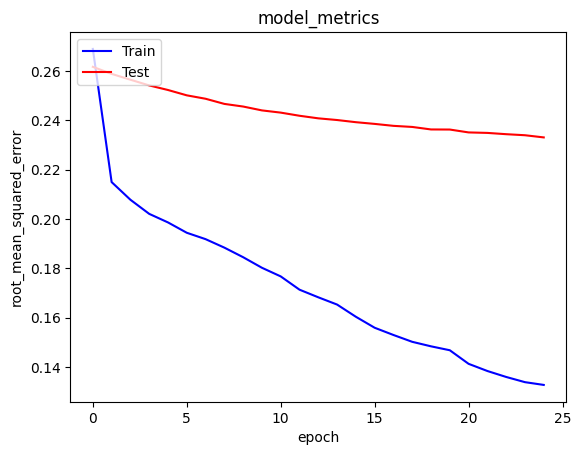

In [41]:
# plot metrics evaluations
plt.plot(history.history['root_mean_squared_error'], color='blue')
plt.plot(history.history['val_root_mean_squared_error'], color='red')
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Get Rekomandasi

In [42]:
# films
films_df = df_film
films_df.head()

,film_id,film_name,genre
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [43]:
# data ratings
df = films
df.head()

,movieId,title,genres,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0,2.0,4.0,2006-03-03 19:57:00
57309,2,Jumanji,Adventure|Children|Fantasy,1995.0,9.0,5.0,1997-03-26 13:32:22
81537,3,Grumpier Old Men,Comedy|Romance,1995.0,8.0,4.0,1998-03-21 15:08:26
93341,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0,141.0,3.0,1996-07-30 07:29:46
95864,5,Father of the Bride Part II,Comedy,1995.0,18.0,4.0,2005-02-13 05:52:25


In [44]:
# taking user samples
user_id = df.userId.sample(1).iloc[0]
films_visited_by_user = df[df.userId == user_id]

# bitwise operators (~), can be found here https://docs.python.org/3/reference/expressions.html
films_not_visited = films_df[~films_df['film_id'].isin(films_visited_by_user.movieId.values)]['film_id']
films_not_visited = list(
    set(films_not_visited)
    .intersection(set(films_to_films_encoded.keys()))
)

films_not_visited = [[films_to_films_encoded.get(x)] for x in films_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_films_array = np.hstack(
    ([[user_encoder]] * len(films_not_visited), films_not_visited)
)

In [45]:
# get recommendations
ratings = model.predict(user_films_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_films_ids = [
    films_encoded_to_films.get(films_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('films with high ratings from user')
print('----' * 8)

top_films_user = (
    films_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

films_df_rows = films_df[films_df['film_id'].isin(top_films_user)]
for row in films_df_rows.itertuples():
    print(row.film_name, ':', row.genre)

print('----' * 8)
print('Top 10 films recommendation')
print('----' * 8)

recommended_films = films_df[films_df['film_id'].isin(recommended_films_ids)]
for row in recommended_films.itertuples():
    print(row.film_name, ':', row.genre)

613/613 [==============================] - 1s 2ms/step
Showing recommendations for users: 12857.0
films with high ratings from user
--------------------------------
State of Things, The : Drama
White Light/Black Rain: The Destruction of Hiroshima and Nagasaki : Documentary|Horror|War
On Your Mark : Animation|Sci-Fi
Ah, L'Amour : Animation|Comedy
Minnie the Moocher : Animation|Comedy
--------------------------------
Top 10 films recommendation
--------------------------------
Tadpole : Comedy|Drama|Romance
Delta Force 2 : Action|Adventure|Thriller|War
Robin and the 7 Hoods : Comedy|Crime|Musical
Landscape in the Mist : Drama
Tai Chi Master : Action|Adventure|Comedy|Drama
C.H.O.M.P.S. : Comedy|Sci-Fi
Block Party : Comedy|Documentary
Child, The : Crime|Drama
2019: After the Fall of New York : Action|Horror|Sci-Fi
Ashby : Comedy|Drama


In [76]:
model.save('recommender_model', save_format='tf')

In [77]:
model.save_weights('recommender_model_weights.h5')